In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

# ポケモンで簡単な統計学を学ぼう
ポケモンのデータを用いて記述統計、推測統計の一部をなぞる。
ついでにポケモンデータの簡単な分析を行う。

※それぞれのポケモン(モンスター)のIDを#、名前を　Nameで表す。  
  
ポケモンには２種類の タイプ属性(Type1, Type2)がある。 
  
さらに6種類の能力値(HP: 体力、Attack: 物理攻撃力, Defense: 物理防御力,   
Sp.Atk: 特殊攻撃力, Sp.Def: 特殊防御力, Speed: 素早さ)をもつ。  
これらの合計値をTotalとする。  
  
またそのポケモンが登場したゲームの世代番号をGenerationとする。  
  
そのポケモンが『伝説』と呼ばれるかを真偽値でLegendaryで表す。

In [4]:
#ポケモンデータ読み込み
pk = pd.read_csv("Pokemon.csv")
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 要約統計量
数値で表されるカテゴリについて、平均(mean)、標準偏差(std)、最小値(min)、最大値(max)、四分位数(25%, 50%, 75%)のデータを表示しデータ要約を確認する。

In [3]:
#ポケモンデータの要約統計量
pk.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


上の要約統計量より、例えばHPの標準偏差が小さいことから、ポケモン間で他の能力に比べばらつきが小さいことがわかる。

# ２つのグループを比較する
『伝説』か否かでポケモンの２グループに分け、それぞれで要約統計量を比べてみる。

In [9]:
#普通のポケモンと伝説のポケモンの要約統計量
#すべての列を表示する
pd.set_option('display.max_columns', 100)
pk.groupby("Legendary").describe()

#                                                             \
           count        mean         std    min    25%    50%    75%    max   
Legendary                                                                     
False      735.0  353.315646  208.590419    1.0  175.5  346.0  533.5  715.0   
True        65.0  470.215385  173.651095  144.0  381.0  483.0  642.0  721.0   

          Attack                                                           \
           count        mean        std   min    25%    50%    75%    max   
Legendary                                                                   
False      735.0   75.669388  30.490153   5.0   54.5   72.0   95.0  185.0   
True        65.0  116.676923  30.348037  50.0  100.0  110.0  131.0  190.0   

          Defense                                                         \
            count       mean        std   min   25%    50%    75%    max   
Legendary                                                                  
False       735.0  71.559184  30.408194   5.0  50.0   66.0   85.0  230.0   
True         65.0  99.661538  28.255131  20.0  90.0  100.0  115.0  200.0   

          Generation                                                  HP  \
               count      mean       std  min  25%  50%  75%  max  count   
Legendary                                                                  
False          735.0  3.284354  1.673471  1.0  2.0  3.0  5.0  6.0  735.0   
True            65.0  3.769231  1.455262  1.0  3.0  4.0  5.0  6.0   65.0   

                                                                Sp. Atk  \
                mean        std   min   25%   50%    75%    max   count   
Legendary                                                                 
False      67.182313  24.808849   1.0  50.0  65.0   79.5  255.0   735.0   
True       92.738462  21.722164  50.0  80.0  91.0  105.0  150.0    65.0   

                                                                   Sp. Def  \
                 mean        std   min    25%    50%    75%    max   count   
Legendary                                                                    
False       68.454422  29.091705  10.0   45.0   65.0   85.0  175.0   735.0   
True       122.184615  31.104608  50.0  100.0  120.0  150.0  194.0    65.0   

                                                                   Speed  \
                 mean        std   min   25%    50%    75%    max  count   
Legendary                                                                  
False       68.892517  25.669310  20.0  50.0   65.0   85.0  230.0  735.0   
True       105.938462  28.827004  20.0  90.0  100.0  120.0  200.0   65.0   

                                                                   Total  \
                 mean        std   min   25%    50%    75%    max  count   
Legendary                                                                  
False       65.455782  27.843038   5.0  45.0   64.0   85.0  160.0  735.0   
True       100.184615  22.952323  50.0  90.0  100.0  110.0  180.0   65.0   

                                                                      
                 mean         std    min    25%    50%    75%    max  
Legendary                                                             
False      417.213605  106.760417  180.0  324.0  425.0  498.0  700.0  
True       637.384615   60.937389  580.0  580.0  600.0  680.0  780.0

平均値がどの能力も伝説のポケモンの方が高いことがわかる。  
一方、標準偏差に大きな差がないので伝説のポケモン間のばらつきと普通のポケモン間のばらつきに大差がないことがわかる。

各能力値についてこれを視覚化して確認する。

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


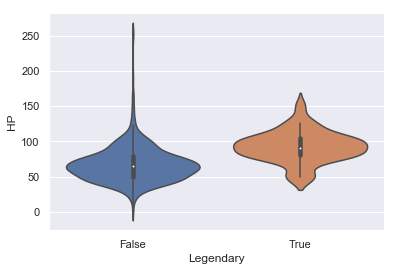

In [17]:
#ヴァイオリンプロットを表示
sns.violinplot(x='Legendary', y='HP', data=pk)

上のプロットから普通のポケモンの一部にHPが非常の高いものがいることがわかる。  
しかし平均的には伝説のポケモンの方がHPが高いとわかる。  
さらに伝説、普通のポケモンの双方、同程度のばらつきをもち、下の他の能力値に比べてばらつきが小さいこともわかる。

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


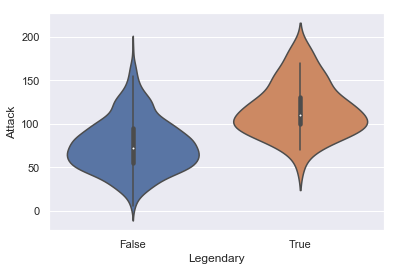

In [12]:
sns.violinplot(x='Legendary', y='Attack', data=pk)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


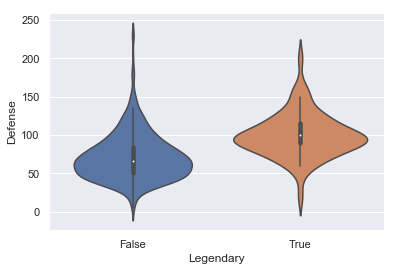

In [13]:
sns.violinplot(x='Legendary', y='Defense', data=pk)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


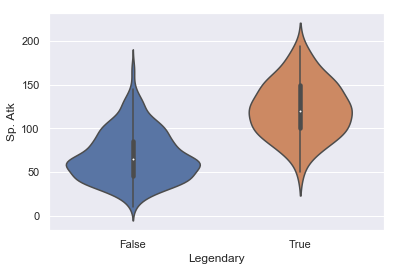

In [14]:
sns.violinplot(x='Legendary', y='Sp. Atk', data=pk)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


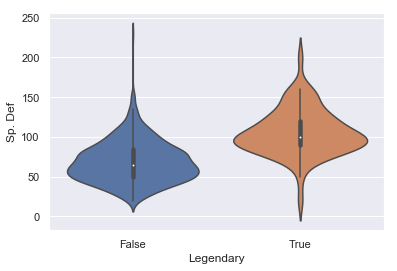

In [15]:
sns.violinplot(x='Legendary', y='Sp. Def', data=pk)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


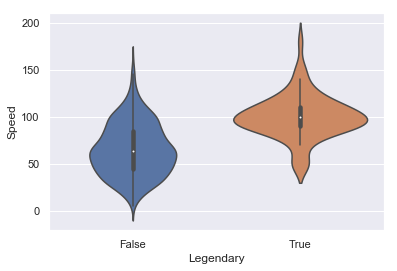

In [16]:
sns.violinplot(x='Legendary', y='Speed', data=pk)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


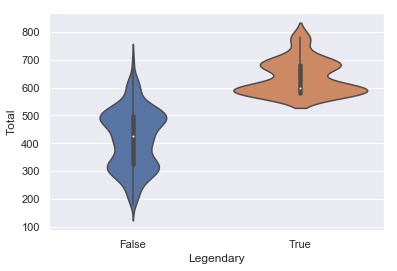

In [18]:
sns.violinplot(x='Legendary', y='Total', data=pk)

直前のプロットはTotalについてで、伝説のポケモンがほとんどの普通のポケモンの合計値より上回っていることがわかる。  
(他の能力値でも伝説のポケモンの方が平均的に高いので当たり前といえば当たり前。)
  
   
続いて同時に各能力値同士の関係を、伝説と普通のポケモンでくらべてみる。

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


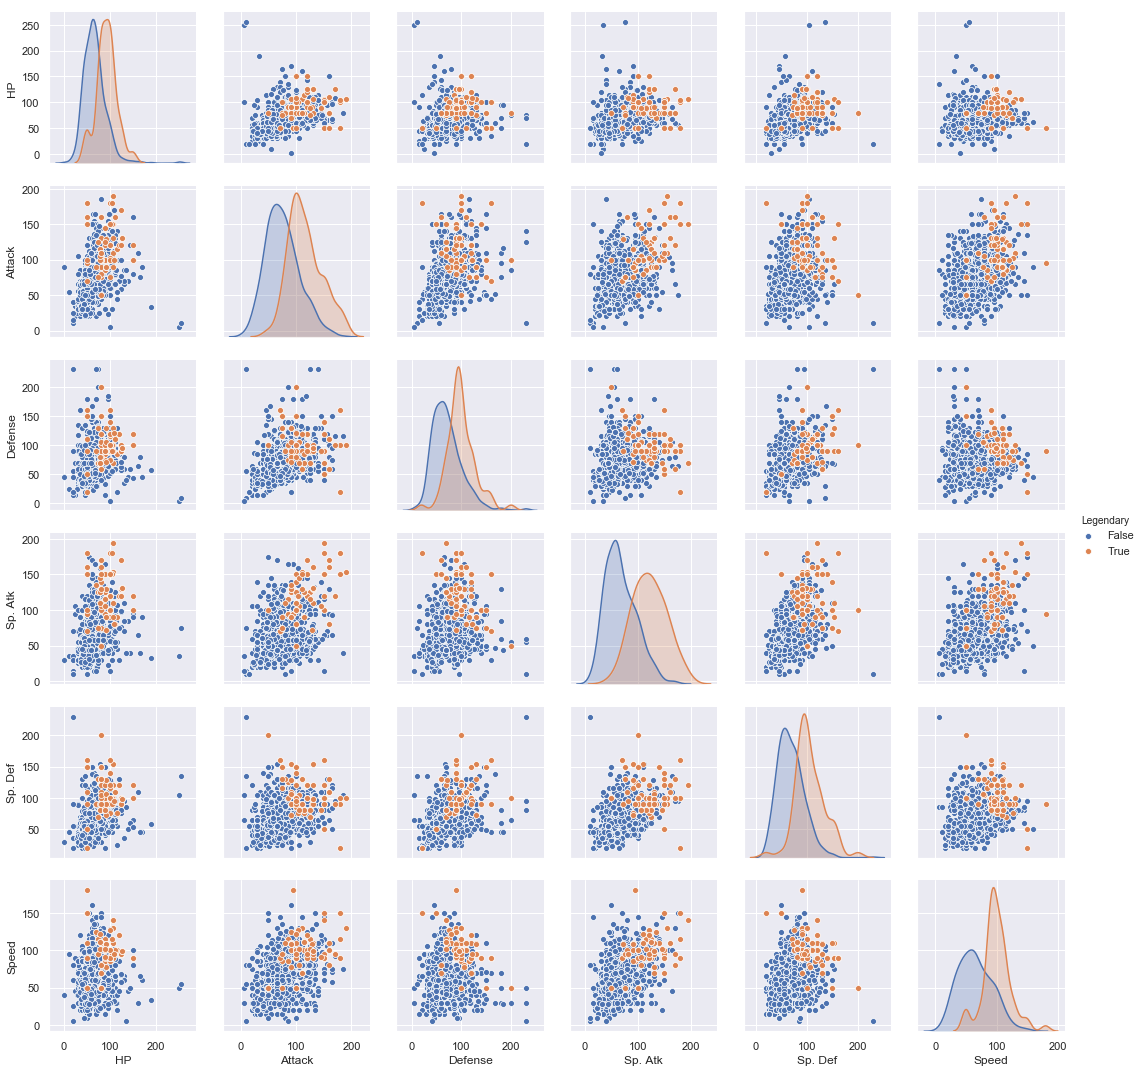

In [19]:
#各能力値のペアで散布図とヒストグラムを表示
sns.pairplot(pk, hue='Legendary', vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])

伝説のポケモンが散布図の集団の右上の位置していることがわかる。  
一方伝説、普通に関係なく能力値ごとに大きな相関はないようにも見える。  
またヴァイオリンプロットでも明らかであったが、伝説と普通のポケモンではSpeedの分布が顕著に異なっていることがより顕著にわかる。

ついでに、世代ごとに普通のポケモンと伝説のポケモンを比較してみる。
HPを例として調べる。

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


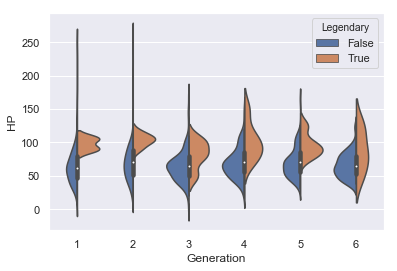

In [23]:
#ヴァイオリンプロットを表示
sns.violinplot(x='Generation', y='HP', hue='Legendary', split=True, data=pk)

上図より第1世代, 第2世代が特徴的だとわかる。  
まず外れ値として、HPが非常に高いポケモンがいる。  
また伝説のポケモン間でのHPのばらつきが、他の世代に比べて小さい。

気になったので第1, 第2世代にいるはずのHP最強のポケモンを調べてみる。

In [39]:
# HPの大きい順にデータを並び替える
sorted_pk = pk.sort_values(by='HP', ascending=False)
# HPの上位3位を表示する
sorted_pk[:3]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False


Blissey(日本語名：ハピナス)とChansey(日本語名：ラッキー)というポケモンがHP上位２位でありHPが250以上で3位以降を圧倒している。  
またこの２匹の世代が第1、第2世代であることも確認できる。

さて能力値ごとの相関に話をもどそう。  
先ほどの散布図からあまり強い相関は見られないが、一応数値としてそれぞれの相関係数を見てみる。

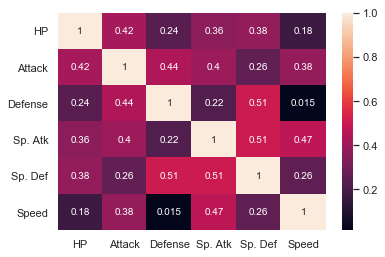

In [41]:
# 各能力値のペアで相関係数を調べる。
features = pk[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
feature_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 相関行列を作成
correlation_matrix = np.corrcoef(features.transpose())

# 色を付けて表す
sns.heatmap(correlation_matrix, annot=True,
            xticklabels=feature_names,
            yticklabels=feature_names)

plt.show()

一般に相関係数の絶対値が  
0.7 ～ 1の時かなり強い相関がある。  
0.4 ～ 0.7の時やや相関がある。  
0.2 ～ 0.4の時弱い相関がある。  
0 ～ 0.2のほとんど相関なし。
  
今回、相関係数の絶対値が大きいものは、  
DefenseとSp. Def、Sp. AtkとSp. Defでそれぞれ0.51、  
即ちやや相関があると判断される。

逆にDefenseとSpeedの相関係数は0.015となり、
ほとんど相関が見られないと言える。

# 中心極限定理を実感しよう
ポケモンデータを使って中心極限定理を体験する。
  
母集団たる上記のポケモンデータから、400匹ランダムに選択する。これらのTotalの値の平均(標本平均)を10000回測定してヒストグラムを描く。  
そしてこのグラフが正規分布に近似できることを確認する。

In [70]:
# 観測値を入れる空のアレイ
sample_mean_array = np.zeros(10000)

#　10000回試行を繰り返す
for i in range(0, 10000):
    # 各々の試行でランダムに400匹のポケモンを選べ平均を測定
    sample = np.random.choice(pk["Total"], size=400, replace=False)
    # 測定結果をアレイにいれる
    sample_mean_array[i] = sp.mean(sample)
    
sample_mean_array

array([436.59 , 431.918, 433.495, ..., 431.853, 433.342, 437.08 ])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


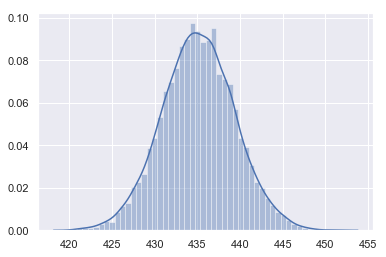

In [71]:
# 測定結果のヒストグラムを描く
sns.distplot(sample_mean_array)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


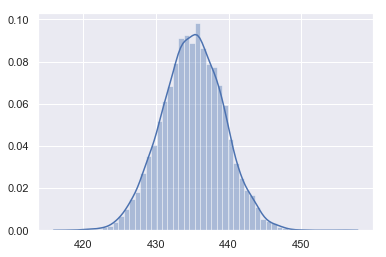

In [67]:
# 中心極限定理が示す正規分布を描く
# 正規分布のパラメータを作る
mu = pk["Total"].mean()
sigma = pk["Total"].std(ddof=1)
N = len(pk)

# 上記パラメータの正規分布から10000回数値を取得
x = np.random.normal(mu, sigma/ sp.sqrt(N), 10000)
# ヒストグラムで描写
sns.distplot(x)

これら２つのグラフがとても似ていることから、母集団に関わらず標本平均が従う分布は正規分布であるといえる。

さらに標本平均がサンプルサイズを大きくするごとに、母平均に近づくことを確かめる。

In [72]:
# 各サンプルサイズを示すアレイ
size_array = np.arange(
    start = 10, stop = 100100, step = 100
)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

Text(0,0.5,'sample mean')

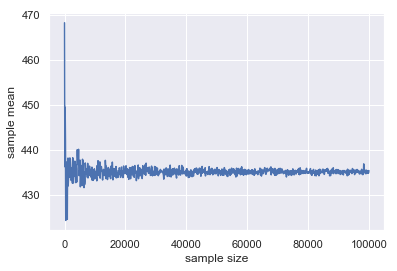

In [74]:
# 測定値入れる空のアレイ
sample_mean_array_size = np.zeros(len(size_array))

# 各サンプルサイズ毎の標本平均を測定
for i in range(0, len(size_array)):
    sample = np.random.choice(pk["Total"], size=size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

# 結果を描写
plt.plot(size_array, sample_mean_array_size)
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [75]:
# 母平均の取得
pk['Total'].mean()

435.103

グラフよりサンプルサイズが大きくなるごとに、標本平均が母平均に近づいていることが読み取れる。